In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63dfe25438>,
      dtype=object)

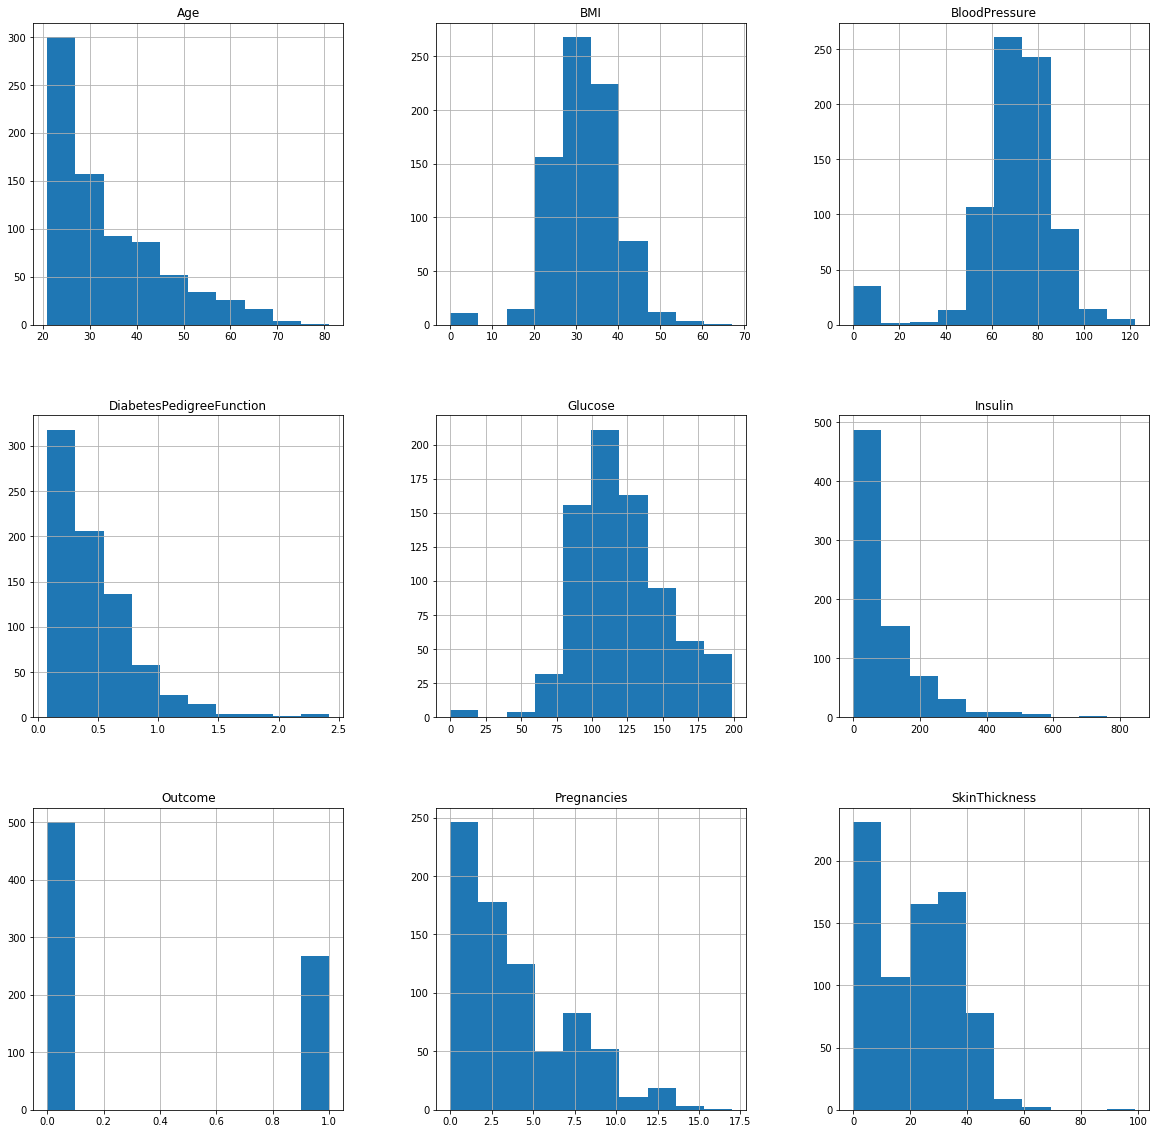

In [8]:
df.hist(figsize=(20,20))
#before preprocessing

In [9]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

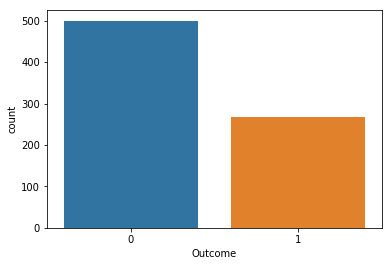

In [10]:
sns.countplot(x='Outcome', data=df)

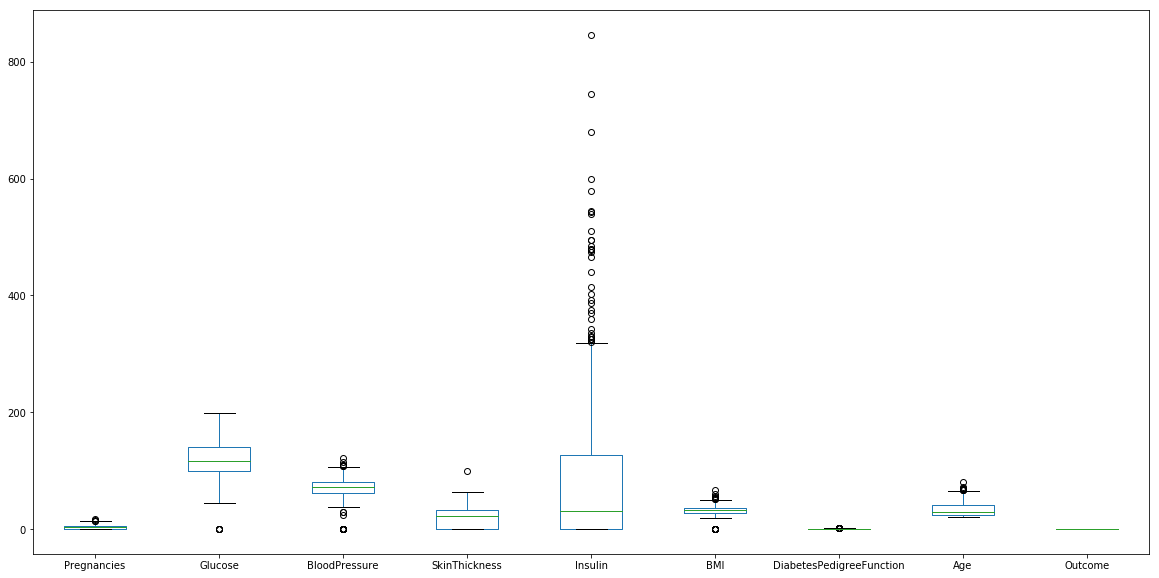

In [11]:
df.plot(kind='box', figsize=(20,10))
plt.show()

In [12]:
df = df[df['SkinThickness'] < 80]
df = df[df['Insulin'] <= 600]
df.shape

(764, 9)

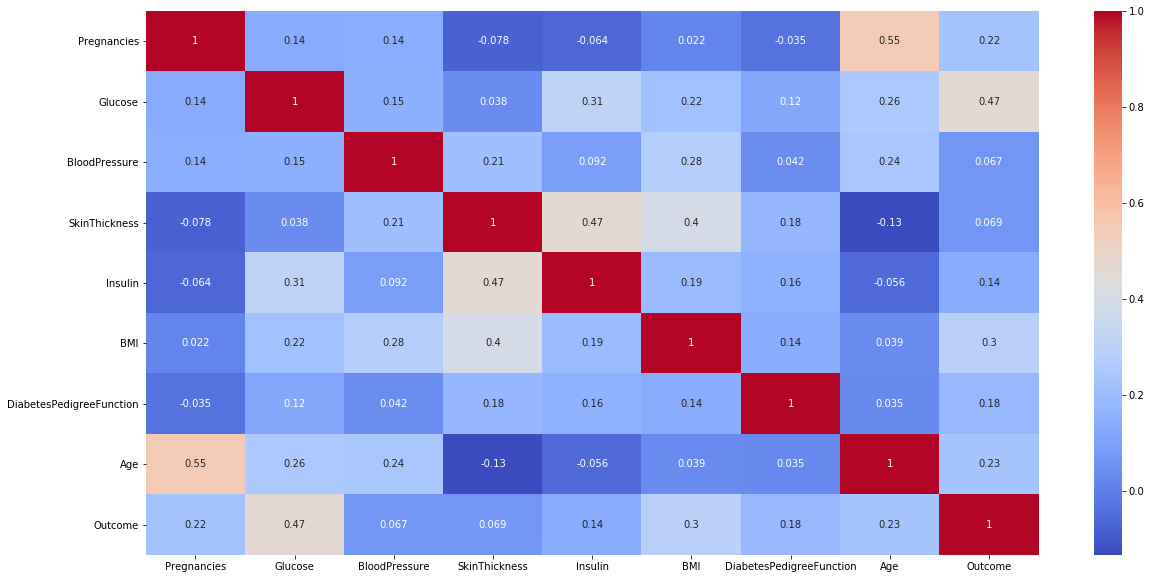

In [13]:
corrmat = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.137261,0.142749,-0.078336,-0.063876,0.021608,-0.034837,0.552249,0.224378
Glucose,0.137261,1.000000,0.153595,0.037620,0.313277,0.217700,0.123758,0.256883,0.469070
BloodPressure,0.142749,0.153595,1.000000,0.209797,0.091987,0.279536,0.041865,0.244027,0.067167
SkinThickness,-0.078336,0.037620,0.209797,1.000000,0.466379,0.395501,0.180394,-0.132228,0.068960
Insulin,-0.063876,0.313277,0.091987,0.466379,1.000000,0.192752,0.160463,-0.056092,0.140820
BMI,0.021608,0.217700,0.279536,0.395501,0.192752,1.000000,0.140059,0.039367,0.297857
DiabetesPedigreeFunction,-0.034837,0.123758,0.041865,0.180394,0.160463,0.140059,1.000000,0.035411,0.183273
Age,0.552249,0.256883,0.244027,-0.132228,-0.056092,0.039367,0.035411,1.000000,0.231562
Outcome,0.224378,0.469070,0.067167,0.068960,0.140820,0.297857,0.183273,0.231562,1.000000


In [15]:
print("total number of rows : {0}".format(len(df)))
print("number of missing pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("number of missing glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of missing bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of missing skinthickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of missing diabetespedigree: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of missing age: {0}".format(len(df.loc[df['Age'] == 0])))

total number of rows : 764
number of missing pregnancies: 110
number of missing glucose: 5
number of missing bp: 35
number of missing skinthickness: 227
number of missing insulin: 373
number of missing bmi: 11
number of missing diabetespedigree: 0
number of missing age: 0


In [16]:
df.loc[df['Insulin'] == 0, 'Insulin'] = df['Insulin'].mean() 
df.loc[df['Glucose'] == 0, 'Glucose'] = df['Glucose'].mean() 
df.loc[df['BMI'] == 0, 'BMI'] = df['BMI'].mean() 
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = df['BloodPressure'].mean() 
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = df['SkinThickness'].mean() 

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,77.246073,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,77.246073,26.6,0.351,31,0
2,8,183.0,64.0,20.390052,77.246073,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


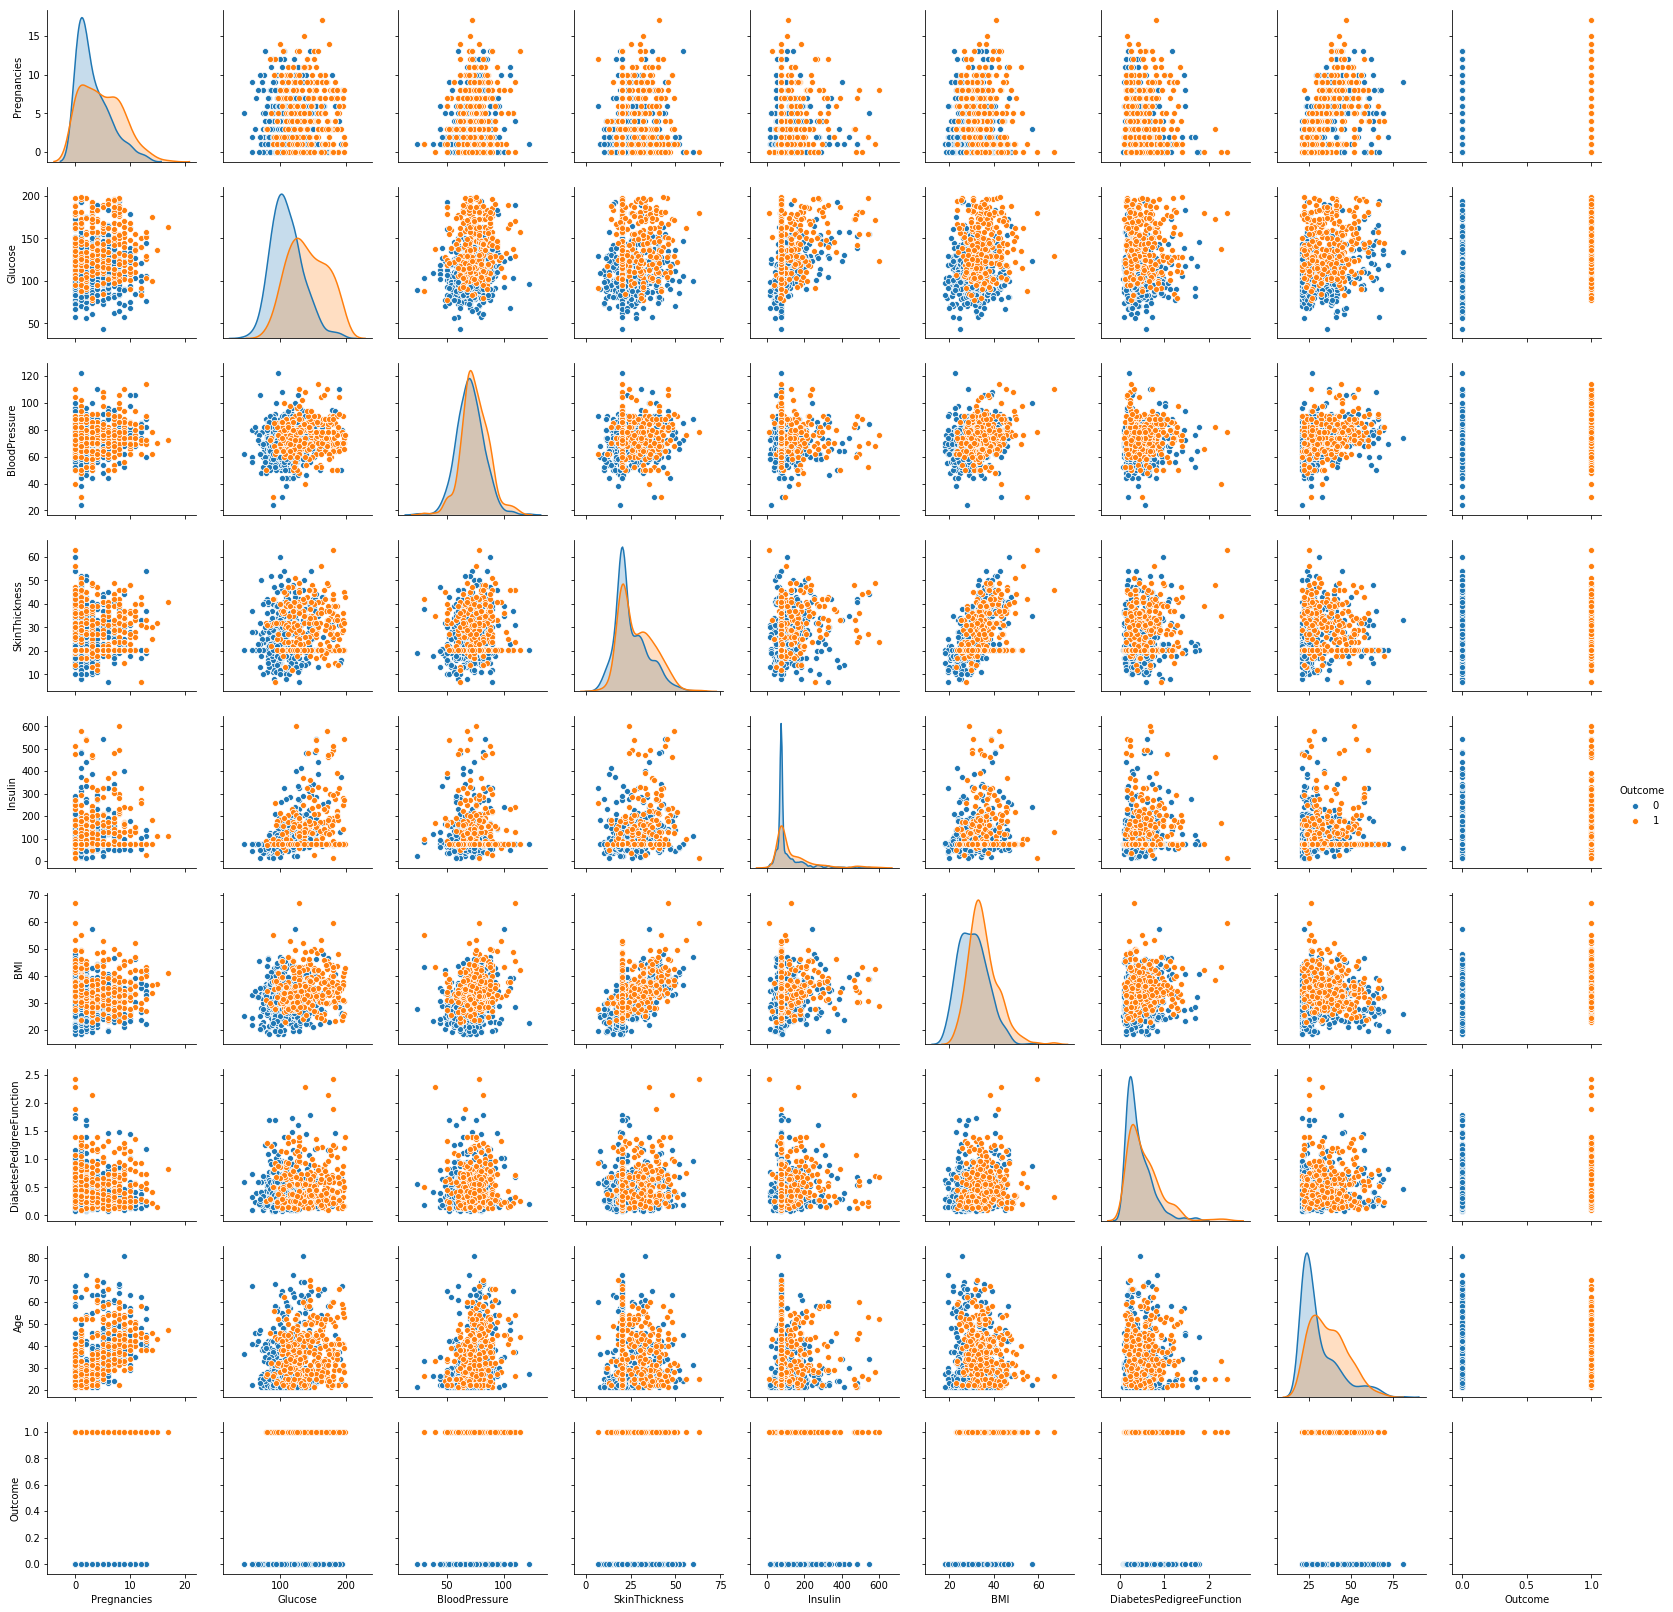

In [18]:
sns.pairplot(df, hue='Outcome')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63b7fce668>,
      dtype=object)

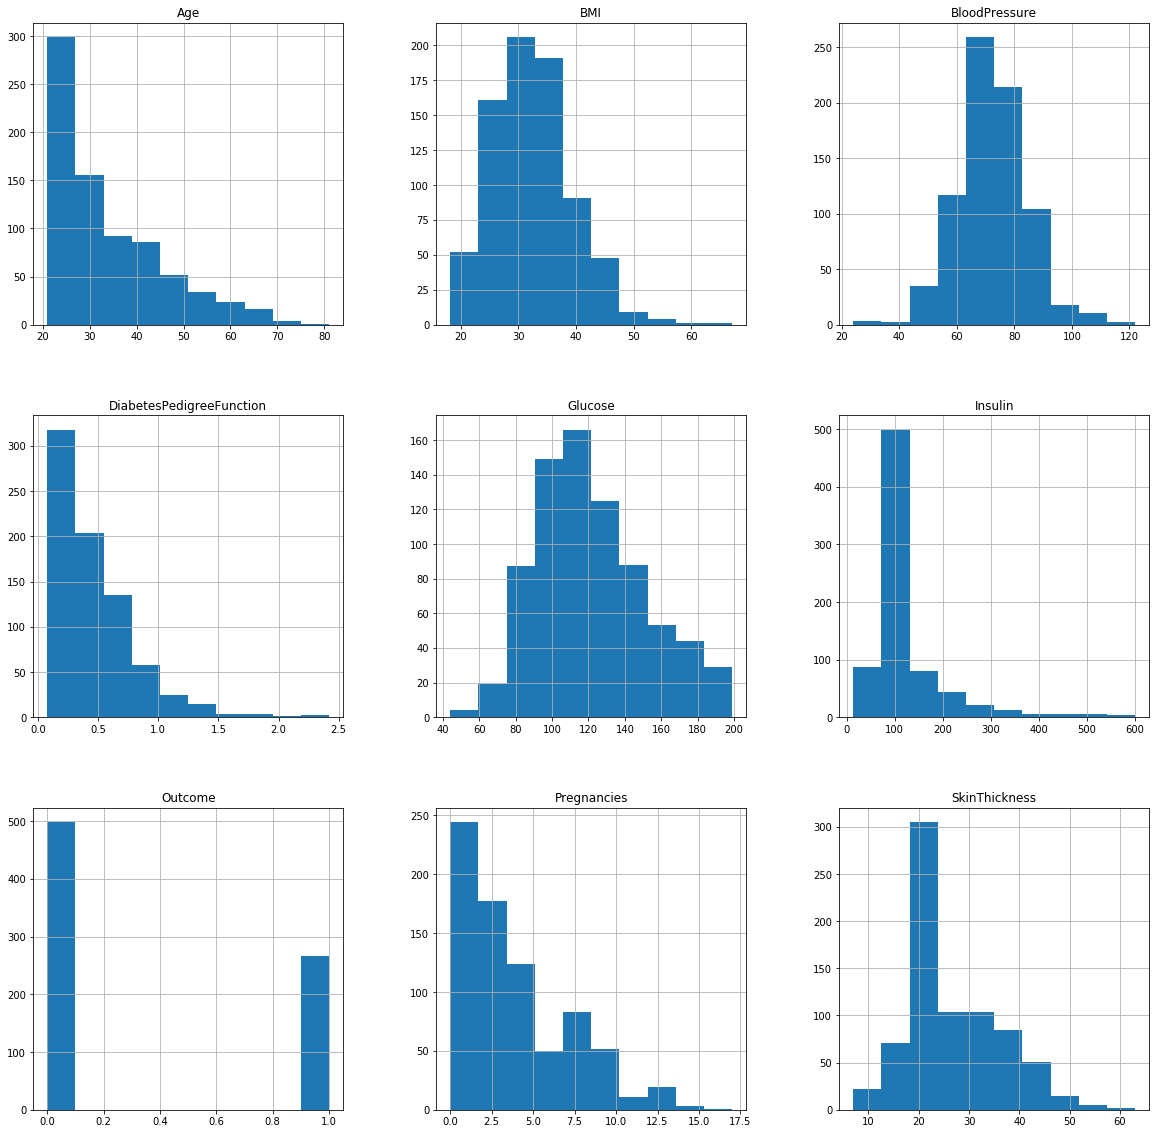

In [19]:
df.hist(figsize=(20,20))
#after preprocessing

In [20]:
df = df/df.max()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.555556,0.128743,0.500745,0.259091,0.617284,1.0
1,0.058824,0.427136,0.540984,0.460317,0.128743,0.396423,0.145041,0.382716,0.0
2,0.470588,0.919598,0.524590,0.323652,0.128743,0.347243,0.277686,0.395062,1.0
3,0.058824,0.447236,0.540984,0.365079,0.156667,0.418778,0.069008,0.259259,0.0
4,0.000000,0.688442,0.327869,0.555556,0.280000,0.642325,0.945455,0.407407,1.0


In [21]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X.head(10)
#y.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.555556,0.128743,0.500745,0.259091,0.617284
1,0.058824,0.427136,0.540984,0.460317,0.128743,0.396423,0.145041,0.382716
2,0.470588,0.919598,0.524590,0.323652,0.128743,0.347243,0.277686,0.395062
3,0.058824,0.447236,0.540984,0.365079,0.156667,0.418778,0.069008,0.259259
4,0.000000,0.688442,0.327869,0.555556,0.280000,0.642325,0.945455,0.407407
5,0.294118,0.582915,0.606557,0.323652,0.128743,0.381520,0.083058,0.370370
6,0.176471,0.391960,0.409836,0.507937,0.146667,0.461997,0.102479,0.320988
7,0.588235,0.577889,0.566293,0.323652,0.128743,0.526080,0.055372,0.358025
8,0.117647,0.989950,0.573770,0.714286,0.905000,0.454545,0.065289,0.654321
9,0.470588,0.628141,0.786885,0.323652,0.128743,0.476286,0.095868,0.666667


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [23]:
l=[]

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('SVM:', acc * 100)
l.append(acc)

SVM: 81.69934640522875


Text(0.5, 15.0, 'Predicted label')

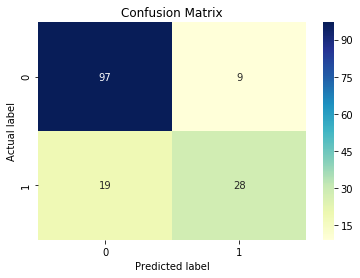

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)

Logistic Regression: 82.35294117647058


Text(0.5, 15.0, 'Predicted label')

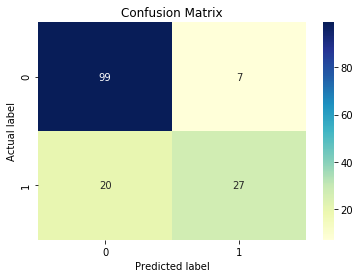

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       106
         1.0       0.79      0.57      0.67        47

    accuracy                           0.82       153
   macro avg       0.81      0.75      0.77       153
weighted avg       0.82      0.82      0.81       153



In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Decision Tree:', acc * 100)
l.append(acc)

Decision Tree: 73.8562091503268


In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Naive Bayes:', acc * 100)
l.append(acc)

Naive Bayes: 78.43137254901961


In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest:',acc * 100)
l.append(acc)

Random Forest: 77.77777777777779


In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Knn:',acc * 100)
l.append(acc)

Knn: 79.73856209150327


In [33]:
l

[0.8169934640522876,
 0.8235294117647058,
 0.738562091503268,
 0.7843137254901961,
 0.7777777777777778,
 0.7973856209150327]

Text(0.5, 0, 'Accuracy')

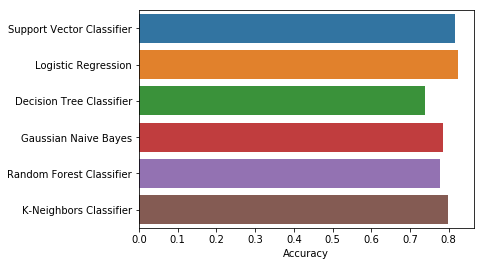

In [34]:
y_axis=['Support Vector Classifier',
      'Logistic Regression',
      'Decision Tree Classifier',
       'Gaussian Naive Bayes',
      'Random Forest Classifier',
      'K-Neighbors Classifier']
x_axis=l
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')

Logistic Regression shows the best accuracy (82.35 %)